# PennyBot for PennyDrops
*Your Financial Literacy Companion*

*Developed by Farah Hoque, Chiara Lu, and David Gao.*

PennyBot, developed for PennyDrops, empowers Canadian university students with financial literacy. By engaging users in interactive conversations, PennyBot aims to demystify financial concepts and instill practical money management skills.

With a focus on investment decisions, PennyBot guides users through 4 scenarios, helping them comprehend risk tolerance, investment options, and potential outcomes. Through PennyBot, we aspire to equip students with the confidence and understanding needed to navigate the complex world of personal finance.

This Jupyter Notebook is organized in foldable headings. The libraries and functions are run first. Then, the four scenarios are run. The function "main()" under "SCENARIO 1 & 2" will run all the scenarios like a real chatbot. A list of references is included at the end of this notebook.

#Import libraries

The provided code snippet initiates the use of essential libraries for data analysis and visualization.

**1. Import pandas Library:**
The "pandas" library is imported as "pd" to facilitate data manipulation and analysis.

**2. Import Matplotlib and Numpy Libraries:**

The "matplotlib.pyplot" library is imported as "plt" for data visualization.
The "numpy" library is imported as "np" for numerical operations.

**3. Import Modules for Enhanced Display:**

The "HTML" and "display" modules are imported from "IPython" to optimize output readability.

**4. Define CSS Styling Function:**

A function is defined to set the CSS styling for output display, limiting each line to 80 characters for clarity.

**5. Execution Hook Registration:**

The function is registered as an execution hook using the "pre_run_cell" event, ensuring consistent styling during code execution.

In [ ]:
# Import pandas library
import pandas as pd

# Import matplotlib.pyplot as plt and numpy as np
import matplotlib.pyplot as plt
import numpy as np

# Import UUID
import uuid

In [ ]:
# Import HTML and display modules from IPython
from IPython.display import HTML, display

# Define a function that sets the CSS styling
# In this way, the length of the outputs will be limited to 80 characters on each line
def set_css():
    display(HTML('''
    <style>
    pre {
        white-space: pre-wrap;
    }
    </style>

    '''))

# Register the function as an execution hook
get_ipython().events.register('pre_run_cell', set_css)


#Dataframe for risk evaluation questions


This section of the code sets up a structured DataFrame to facilitate the assessment of risk evaluation questions and their corresponding answer options. It is designed to aid decision-making and scoring based on individuals' risk-taking attitudes. The key components of this setup include:

**1. Questions and Answer Options:**

A comprehensive list of 13 risk evaluation questions is defined, each with multiple answer options. These questions address scenarios involving risk-taking, investment choices, and personal preferences.

**2. Scoring Dictionary:**

A scoring dictionary, denoted as 'scoring,' is established to assign numerical values to each answer option of the questions. This dictionary enables quantifying responses and evaluating individuals' risk profiles based on their selections.

In [ ]:
# Questions and answer options
questions = [
    "Q 1/13. In general, how would your best friend describe you as a risk taker?",
    "Q 2/13. You are on a TV game show and can choose one of the following; which would you take?",
    "Q 3/13. You have just finished saving for a 'once-in-a-lifetime' vacation.\
     \nThree weeks before you plan to leave, you lose your job. You would:",
    "Q 4/13. If you unexpectedly received $20,000 to invest, what would you do?",
    "Q 5/13. In terms of experience, how comfortable are you investing in stocks or stock mutual funds?",
    "Q 6/13. When you think of the word 'risk,' which of the following words comes to mind first?",
    "Q 7/13. Some experts are predicting prices of assets such as gold, jewels,\
    \ncollectibles, and real estate (hard assets) to increase in value;\\0\
    \nbond prices may fall, however, experts tend to agree that government bonds\
    \nare relatively safe. Most of your investment assets are now in high-interest government bonds. What would you do?",
    "Q 8/13. Given the best and worst case returns of the four investment choices below,\
    \n which would you prefer?",
    "Q 9/13. In addition to whatever you own, you have been given $1,000.\
    \nYou are now asked to choose between:",
    "Q 10/13. In addition to whatever you own, you have been given $2,000.\
    \nYou are now asked to choose between",
    "Q 11/13. Suppose a relative left you an inheritance of $100,000, stipulating\
    \nin the will that you invest ALL the money in ONE of the following choices.\
    \nWhich one would you select?",
    "Q 12/13. If you had to invest $20,000, which of the following investment\
    \nchoices would you find most appealing?",
    "Q 13/13. Your trusted friend and neighbor, an experienced geologist, is\
    \nputting together a group of investors to fund an exploratory gold mining\
    \nventure. The venture could pay back 50 to 100 times the investment if successful.\
    \nIf the mine is a bust, the entire investment is worthless. Your friend estimates the chance of success is only 20%. If you had the money, how much would you invest?"
]

answer_options = [
    ["a. A real gambler", "b. Willing to take risks after completing adequate research", "c. Cautious", "d. A real risk avoider"],
    ["a. $1,000 in cash", "b. A 50% chance at winning $5,000", "c. A 25% chance at winning $10,000", "d. A 5% chance at winning $100,000"],
    ["a. Cancel the vacation", "b. Take a much more modest vacation", "c. Go as scheduled, reasoning that you need the time to prepare for a job search", "d. Extend your vacation, because this might be your last chance to go first-class"],
    ["a. Deposit it in a bank account, money market account, or insured CD", "b. Invest it in safe high-quality bonds or bond mutual funds", "c. Invest it in stocks or stock mutual funds"],
    ["a. Not at all comfortable", "b. Somewhat comfortable", "c. Very Comfortable"],
    ["a. Loss", "b. Uncertainty", "c. Opportunity", "d. Thrill"],
    ["a. Hold the bonds", "b. Sell the bonds, put half the proceeds into money market accounts, and the other half into hard assets", "c. Sell the bonds and put the total proceeds into hard assets", "d. Sell the bonds, put all the money into hard assets, and borrow additional money to buy more"],
    ["a. $200 gain best case; $0 gain/loss worst case", "b. $800 gain best case, $200 loss worst case", "c. $2,600 gain best case, $800 loss worst case", "d. $4,800 gain best case, $2,400 loss worst case"],
    ["a. A sure gain of $500", "b. A 50% chance to gain $1,000 and a 50% chance to gain nothing."],
    ["a. A sure loss of $500", "b. A 50% chance to lose $1,000 and a 50% chance to lose nothing."],
    ["a. A savings account or money market mutual fund", "b. A mutual fund that owns stocks and bonds", "c. A portfolio of 15 common stocks", "d. Commodities like gold, silver, and oil"],
    ["a. 60% in low-risk investments, 30% in medium-risk investments, 10% in high-risk investments", "b. 30% in low-risk investments, 40% in medium-risk investments, 30% in high-risk investments", "c. 10% in low-risk investments, 40% in medium-risk investments, 50% in high-risk investments"],
    ["a. Nothing", "b. One month’s salary", "c. Three month’s salary", "d. Six month’s salary"]
]

# Scoring dictionary
scoring = {
    '1': {'A': 4, 'B': 3, 'C': 2, 'D': 1},
    '2': {'A': 1, 'B': 2, 'C': 3, 'D': 4},
    '3': {'A': 1, 'B': 2, 'C': 3, 'D': 4},
    '4': {'A': 1, 'B': 2, 'C': 3},
    '5': {'A': 1, 'B': 2, 'C': 3},
    '6': {'A': 1, 'B': 2, 'C': 3, 'D': 4},
    '7': {'A': 1, 'B': 2, 'C': 3, 'D': 4},
    '8': {'A': 1, 'B': 2, 'C': 3, 'D': 4},
    '9': {'A': 1, 'B': 3},
    '10': {'A': 1, 'B': 3},
    '11': {'A': 1, 'B': 2, 'C': 3, 'D': 4},
    '12': {'A': 1, 'B': 2, 'C': 3, 'D': 4},
    '13': {'A': 1, 'B': 2, 'C': 3, 'D': 4}
}

# Dataframe for investment options and conditions

The following code segment outlines the creation of a structured DataFrame to encapsulate essential information about various investment options and their associated conditions. It aids in evaluating and comparing different investment products based on factors like risk, returns, and investment goals.
The key components of this setup include:

**1.Data Dictionary Construction:**

A comprehensive dictionary named 'data' is formulated, encompassing multiple aspects of investment options. These include the financial product's name, time horizon, investment goal, minimum and maximum risk levels, expected returns, and detailed descriptions.

**2. Pandas DataFrame Generation:**

The 'data' dictionary is used to generate a structured pandas DataFrame named 'table.' This DataFrame is organized with columns representing different aspects of investment options and rows corresponding to each investment product.

In [ ]:
# Create a dictionary with the table data
data = {
  "financial product": ["Cash Deposit", "GIC", "Bond Index ETF", "Market Index ETF", "Monthly Income ETF"],
  "time_horizon": ["a", "b/c", "b", "c", "b/c"],
  "goal": ["a/b/c", "a/b", "a/b", "a/b", "c"],
  "min_risk": [0, 0, 0, 22, 22],
  "max_risk": [47, 22, 18, 47, 47],
  "return": [1.5, 3.3, 1.94, 7.59, 7.31],
  "description": ["A cash deposit is a type of investment that involves putting money into a bank account or other financial institution that pays interest and is insured by the Federal Deposit Insurance Corporation (FDIC). Cash deposits are usually short-term investments that offer low returns but also low risk and high liquidity. Some examples of cash deposits are savings accounts, certificates of deposit (CDs), and money market accounts. Cash deposits can be useful for saving money for emergencies, short-term goals, or as a part of a diversified portfolio","A GIC is a guaranteed investment certificate that is sold by Canadian financial institutions. When you buy a GIC, you deposit money in the bank for a fixed length of time, usually from a few months to a few years, and receive interest on that money and the principal when the investment matures. A GIC is a low-risk investment that guarantees 100% of your original investment, regardless of market fluctuations. However, a GIC also offers low returns compared to other investments, and you may have to pay a penalty if you withdraw your money before the maturity date","A bond index ETF is an exchange-traded fund that invests in a basket of bonds that track the performance of a bond index. Bond index ETFs can help reduce the volatility and drawdowns of your portfolio, especially during bear markets or crashes, as bonds tend to have a negative or low correlation with stocks","A market index ETF is an exchange-traded fund that invests in a basket of stocks that track the performance of a market index, such as the S&P 500, the Nasdaq 100, or the TSX Composite.","A monthly income ETF can provide you with a steady and predictable source of income, which can be useful for budgeting, retirement planning, or reinvesting. A monthly income ETF can invest in a variety of income-generating assets, such as stocks, bonds, preferred shares, real estate investment trusts (REITs), or master limited partnerships (MLPs)"]
}

# Create a pandas dataframe from the dictionary and assign it to a variable called table
table = pd.DataFrame(data)

# Store questions on time horizon & goal

In this code section, two variables are taken to make personalised investment recommendations-

**1. Time Horizon:**

The questions are asked to gauge the anticipated duration for which the individual plans to keep their investment. This could include various timeframes, such as less than a year, 1-5 years, or 5+ years. Three distinct options are provided to capture a wide spectrum of investment time horizons.

**2. Investment Goal Question and Options:**

This variable seeks to understand the primary objective behind the investment. This could encompass various aspirations like general savings, retirement planning, or generating regular income. Three comprehensive options are offered to reflect different investment goals and motivations.

In [ ]:
# Define the questions and the options
question_time = "What's the time horizon of your investment?"
options_time = ["Less than 1 year", "1-5 years", "5+ years"]

question_goal = "What is your investment goal?"
options_goal = ["General savings", "Retirement", "Income generation"]

# Initialize the variables
time_horizon = None
goal = None

# Function to provide information about Banking

This code section encapsulates an educational function designed to enlighten users about various aspects of banking. This function serves as a valuable resource for enhancing financial literacy. Key points regarding this educational function are as follows:

**1. Function Overview:**

The function banking_logic() initiates an informative dialogue to educate users about different types of bank accounts, namely Checking and Savings accounts.
Users are prompted to make a choice regarding the type of account they wish to learn about: Checking, Savings, or Both. Users are guided to an Pennydrops' courses for deeper insights.

**2. Error Handling:**

The function is equipped with an error-checking mechanism to address an invalid choice and guide users accordingly.

In [ ]:

def banking_logic():
    print("What type of account would you like to know about?")
    print("1. Checking")
    print("2. Savings")
    print("3. Both")

    choice = input("Enter the corresponding number: ")

    if choice == "1":
        print("A checking account is a type of bank account that allows you to deposit and withdraw money using checks, debit cards, or online transfers.")
        print("- You can access your money easily and conveniently.")
        print("- You can pay your bills online or by phone.")
        print("- You can avoid carrying cash or paying fees for money orders.")
        print('''- You can learn more about this topic here: https://anywhere.pennydrops.org/courses/lesson-2-banking-101''')
    elif choice == "2":
        print("A savings account is a type of bank account that pays you interest on the money you deposit. It is a good way to save money for your goals or emergencies.")
        print("- You can earn interest on your money and grow your savings.")
        print("- You can save money for your short-term or long-term goals.")
        print("- You can have an emergency fund for unexpected expenses.")
        print('''- You can learn more about this topic here: https://anywhere.pennydrops.org/courses/lesson-2-banking-101''')
    elif choice == "3":
        print("You can use your checking account for daily transactions and your savings account for saving money.")
        print("- You can transfer money between your accounts easily and quickly.")
        print("- You can have more control over your finances and budget.")
        print('''- You can learn more about this topic here: https://anywhere.pennydrops.org/courses/lesson-2-banking-101''')
    else:
        print("Invalid choice.")



# Function to provide information about credit options

The provided code segment encapsulates a function aimed at delivering comprehensive insights into various credit options, specifically focusing on Mortgage and Credit Card accounts.

**1. Function Overview:**

The function credit_logic() initiates an interactive information-sharing session, guiding users through essential knowledge about Mortgage and Credit Card accounts. Users are prompted to select the type of account they wish to learn about: Mortgage, Credit Card, or Both. Users are guided to an Pennydrops' courses for deeper insights.

**2. Error Handling:**

The function incorporates an error-checking mechanism to address an invalid choice and provide guidance accordingly.


In [ ]:
def credit_logic():
    print("What type of account would you like to know about?")
    print("1. Mortgage")
    print("2. Credit Card")
    print("3. Both")

    choice = input("Enter the corresponding number: ")

    if choice == "1":
        print("A mortgage is a type of loan that's used to purchase or maintain real estate, using the property as collateral for repayment.")
        print("- You can buy a home or land without paying the full price upfront.")
        print("- You can build equity and wealth as you pay off your loan and your property value increases.")
        print("- You can enjoy tax deductions on the interest and property taxes you pay.")
        print('''- You can learn more about this topic here: https://anywhere.pennydrops.org/courses/lesson-4-credit''')
    elif choice == "2":
        print("A credit card is a plastic card that allows you to buy things now and pay for them later. You can use it online, in stores, or anywhere that accepts credit cards. You have to pay back the money you borrow, plus interest and fees, by a certain date.")
        print("- You can build your credit history and improve your credit score.")
        print("- You can enjoy rewards, cash back, or other perks.")
        print("- You can have more flexibility and convenience when shopping.")
        print('''- You can learn more about this topic here: https://anywhere.pennydrops.org/courses/lesson-4-credit''')
    elif choice == "3":
        print("A mortgage is a type of loan that you can use to buy or maintain a property, such as a house or a land. A credit card is a type of revolving credit that you can use to buy anything, such as a TV or a laptop. Both have advantages and disadvantages, depending on your needs and goals.")
        print('''- You can learn more about this topic here: https://anywhere.pennydrops.org/courses/lesson-4-credit''')
    else:
        print("Invalid choice.")


# Function to get user answers for risk tolerance score

This code section outlines the function to ask user inout for calculating their risk tolerance score. Key characteristics of this interactive function are:

**1. User-Prompted Question and Options:**

The function prompts users with a question relevant to the context and topic.
The available answer options are presented, enabling users to select an appropriate choice.

**2. Input Validation and Letter Format:**

Users are guided to input their response as a letter, corresponding to the provided options (e.g., 'a', 'b', 'c').
The function generates valid letter answers ('a', 'b', 'c', ...) based on the number of options.

In [ ]:
# Function to prompt user and store answers
def get_user_answer(question, options):
    print(question)
    for option in options:
        print(option)
 # Generate valid letter answers (a, b, c, ...)
    valid_answers = [chr(97 + i) for i in range(len(options))]

    while True:
        user_answer = input("\nEnter your letter answer: ").strip().lower()

        if user_answer in valid_answers:
            print(" ")
            return user_answer.upper()
        else:
            print("Invalid input. Please enter a valid letter answer.")

# Function to print risk tolerance score and level

In [ ]:
risk_tolerance_score = 0

def scenario_3():
  answers_list = []
  # Loop through each question and append user answers to answer list
  for i in range(len(questions)):
    user_answer = get_user_answer(questions[i], answer_options[i])
    answers_list.append({"Question": questions[i], "Answer": user_answer,\
                         "Score": scoring.get(str(i + 1)).get(user_answer, 0)})
    # Create a DataFrame from the list of dictionaries
  answers = pd.DataFrame(answers_list)

    # Calculate risk tolerance score
  risk_tolerance_score = answers['Score'].sum()

    # Display the answers DataFrame and the risk tolerance score
  print("\nUser Answers:\n", answers)
  print("\nRisk Tolerance Score:", risk_tolerance_score)
  print(" ")

    # Find what risk tolerance group the user belongs to
  risk_tolerance_level = "Your risk tolerance level is:"
  if risk_tolerance_score >= 33 and risk_tolerance_score <= 47:
    print(risk_tolerance_level, "High tolerance for risk")
  elif risk_tolerance_score >= 29 and risk_tolerance_score <= 32:
    print(risk_tolerance_level, "Above-average tolerance for risk")
  elif risk_tolerance_score >= 23 and risk_tolerance_score <= 28:
    print(risk_tolerance_level, "Average/moderate tolerance for risk")
  elif risk_tolerance_score >= 19 and risk_tolerance_score <= 22:
    print(risk_tolerance_level, "Below-average tolerance for risk")
  elif risk_tolerance_score >= 0 and risk_tolerance_score <= 18:
    print(risk_tolerance_level, "Low tolerance for risk")
  else:
    print("Invalid score")

# Function to ask questions goal & time horizon

This code outlines the functionality of the q_goal() function, which facilitates user input and response processing related to investment goals and time horizons. Here are the key features of this function:

**1. Customizable Question and Options:**

The function takes two parameters, allowing customization of the question and available answer options based on the context.The user is prompted with the specified question, and the provided options are displayed sequentially.

**2. Global Variable Manipulation:**

The global keyword is used to access and update the global variable goal.
The user's choice is converted into the appropriate goal code ('a', 'b', 'c') and stored in the global variable.

**3. chr() Manipulation**

The chr() function converts a number to a character based on the ASCII code. The ASCII code for “a” is 97, so chr(97) returns “a”. Similarly, chr(98) returns “b” and chr(99) returns “c”. The i variable is the index of the option in the list, starting from 0. So, to get the corresponding letter, we add 97 to i and use the chr() function. For example, if i is 0, then chr(i+97) is “a”. If i is 1, then chr(i+97) is “b”. And so on.

In [ ]:
# Define the function with two parameters: question and options
def q_goal(question, options):
    # Use the global keyword to access the global variable goal
    global goal
    # Print the question
    print(question)
    # Loop through the options and print them with letters
    for i, option in enumerate(options):
        print(f"{chr(i+97)}. {option}")
    # Initialize a variable to store the answer
    answer = None
    # Use a while loop to repeat until the answer is valid
    while answer not in ["a", "b", "c"]:
        # Get the user input as a lowercase string
        answer = input("Enter your choice: ").lower()
        # Check if the answer is valid
        if answer in ["a", "b", "c"]:
            # Update the global variable goal based on the answer
            goal = answer
            # Return the answer as a string
            return options[ord(answer)-97]
        else:
            # Print a message to inform the user
            print("Your response is not an option")



In [ ]:
# Define the function with two parameters: question and options
def q_horizon(question, options):
    # Use the global keyword to access the global variable goal
    global time_horizon
    # Print the question
    print(question)
    # Loop through the options and print them with letters
    for i, option in enumerate(options):
        print(f"{chr(i+97)}. {option}")
    # Initialize a variable to store the answer
    answer = None
    # Use a while loop to repeat until the answer is valid
    while answer not in ["a", "b", "c"]:
        # Get the user input as a lowercase string
        answer = input("Enter your choice: ").lower()
        # Check if the answer is valid
        if answer in ["a", "b", "c"]:
            # Update the global variable goal based on the answer
            time_horizon = answer
            # Return the answer as a string
            return options[ord(answer)-97]
        else:
            # Print a message to inform the user
            print("Your response is not an option")


 # Function to filter for investment recommendation

This code section outlines the functionality of the recommend() function, which filters and recommends investment options based on specified criteria. Here are the key features of this function:

**1. Filtering Criteria:**

The function filters the investment options table based on the user's time horizon, investment goal, and risk tolerance score. It employs the apply method to perform a substring search for time horizon and goal within their respective columns.Filters out rows where the risk tolerance score falls outside the min-max risk range.

**2. Handling Empty Results:**

If the filtered results are empty, the function defaults to the first row of the original table for recommendations.
Otherwise, it selects recommendations from the filtered table.

**3. Recommendation Details:**

The function extracts the recommended financial product, its return rate, and description from the selected row(s).
It prepares and prints a personalized recommendation message for the user.
The message includes information about the recommended investment, its average return rate, and key features.

**4. Graph Visualization:**

The function hints at graphing by mentioning the value of an investment over time using a specific example scenario.

In [ ]:
def recommend():

    # Filter the table by the order of time_horizon, goal, and risk level
    # Use apply method to apply str.contains to each element of the list columns
    filtered_table = table[(table["time_horizon"].apply(lambda x: time_horizon in x)) & (table["goal"].apply(lambda x: goal in x)) & (table["min_risk"] <= risk_tolerance_score) & (table["max_risk"] >= risk_tolerance_score)]

    global rec_return

    # Check if the filtered_table is empty
    if filtered_table.empty:
        # Set the variables to the first row of the table
        recommended = table["financial product"].values[0]
        rec_return = table["return"].values[0]
        rec_desc = table["description"].values[0]
    else:
        # Set the variables to the filtered_table
        recommended = filtered_table["financial product"].values[0]
        rec_return = filtered_table["return"].values[0]
        rec_desc = filtered_table["description"].values[0]

    # Print the message
    print(f"\nWe recommend you to invest in {recommended} which has an average return rate of {rec_return}%.\nHere are some features about {recommended}: {rec_desc}.\nHere is a graph showing you the value of your investment if you invested $10,000 dollar today for 10 years")


# Function to graph

The following code highlights the functionality of the graph() function. Here are the key features of this function, presented in bullet points:

**1. Graph Generation:**

The function generates a line graph to visualize the growth of a hypothetical investment over time.
It calculates the investment value at each month using the compound interest formula.
Utilizes the plt.plot function to create the plot with months on the x-axis and investment values on the y-axis.

**2. Plot Customization:**

Labels the x-axis as "Year" and the y-axis as "Investment Value" using plt.xlabel and plt.ylabel. Assigns a title to the plot that includes the compounded growth rate of the investment. Applies gridlines to the plot to aid visualization.

**3. Annotations and Limits:**

Adds an annotation to the graph indicating the end value of the investment using plt.annotate.

**4. Formatting and Display:**

Defines a custom function, format_dollars, to format y-axis labels as dollar amounts.
Displays the graph using plt.show().

In [ ]:
def graph():

    # Create a list of months from 0 to 120
    months = list(range(121))

    # Create a list of portfolio values using the formula
    values = [10000 * (1 + rec_return / 100) ** (month / 12) for month in months]

    # Plot the months and values lists using plt.plot
    plt.plot(months, values)

    # Add labels and title to the plot using plt.xlabel, plt.ylabel and plt.title
    plt.xlabel("Year")
    plt.ylabel("Investment Value")
    plt.title(f"$10K investment over 10 Years with {rec_return}% Compounded Growth Rate")

    # Smooth out the curve using plt.grid
    plt.grid()

    # Create a variable called end_value and assign it the last element of the values list
    end_value = values[-1]

    # Use plt.annotate to add a text and an arrow pointing to the end value on the graph
    plt.annotate(f"End value: ${np.round(end_value, 2)}", xy=(120, end_value), xytext=(80, end_value + 5000), arrowprops=dict(arrowstyle="->"))

    # Use plt.xlim to set the x-axis limits from 0 to 120
    plt.xlim(0, 120)

    # Use plt.xticks to set the x-axis ticks and labels from 0 to 10 with a step of 1
    plt.xticks(np.arange(0, 121, 12), np.arange(0, 11))

    # Use plt.ylim to set the y-axis limits from 10000 to end_value + 10000
    plt.ylim(10000, end_value + 10000)

    # Define a custom function that adds a dollar sign and a comma to the numbers
    def format_dollars(x, pos):
        return f"${x:,.0f}"

    # Show the plot using plt.show
    plt.show()



# Function to group functions in scenario 4

This code outlines the key aspects of the scenario_4() function, which serves as the main function for guiding users through the process of investment decision-making and visualization. Here are the notable features:

**1. User Interaction:**

Prints an explanatory line to communicate the function's purpose and guide users through the process. Prompts users to answer two critical questions: their investment time horizon and their investment goal.

**2. Time Horizon and Goal Acquisition:**

Calls the q_horizon() function to capture user input for the investment time horizon.Calls the q_goal() function to obtain user input for the desired investment goal.

**3. Recommendation Generation:**

Invokes the recommend() function to generate personalized investment recommendations based on the user's inputs.Utilizes user-provided time horizon, investment goal, and risk tolerance to filter and identify suitable investment options.

**4. Investment Visualization:**

Calls the graph() function to generate a graphical representation of the potential growth of the recommended investment over a 10-year period.
Provides users with a visual depiction of the investment's growth trajectory and potential outcomes.



In [ ]:
def scenario_4():

    # Print the line explaining the purpose of the function
    print("\nPennyBot uses your investment time horizon and investment goals to find the options that's most suitable for you.\nPlease answer the following 2 questions.\n")

    # Call the functions to get the user input for time_horizon and goal
    q_horizon(question_time, options_time)
    "\n"
    q_goal(question_goal, options_goal)

    # Call the function to recommend a product based on the user input
    recommend()

    # Call the function to plot a graph of the investment value
    graph()

    # Print disclaimer
    print("Disclaimer: The information provided in this program is for general guidance and educational purposes only. It does not constitute professional financial or investment advice. We do not guarantee any results and we are not liable for any losses or damages arising from using this information. Always do your own research and seek professional advice before making any financial decisions. Investing involves risks and you may lose money.")


# Main Function that loops all functions

This code section defines a central function, main(), designed to create an engaging and user-driven learning experience through PennyBot's financial literacy lessons. Key features of this interactive main function are highlighted below:

**1. Purpose and Introduction:**

Upon execution, the function welcomes users with a personalized introduction, portraying PennyBot as an informative companion specializing in financial literacy.
Users are introduced to PennyBot's categories of knowledge dissemination: Banking, Credit, and Investment.

**2. User-Driven Topic Selection:**

The function prompts users to express their area of interest by selecting from the provided categories (Banking, Credit, Investment).
User input is validated to ensure accurate selection.

**3. Interactive Knowledge Sharing:**

Based on the user's selection, the function seamlessly connects with dedicated logic functions (banking_logic(), credit_logic(), investment_logic()) to provide detailed insights into the chosen financial domain.
Each logic function engages users with comprehensive explanations and valuable insights.

**4. Continuity and Exploration:**

After knowledge sharing for the selected topic, users are given the option to explore additional topics. The function queries users about their interest in learning about another topic.

**5. Flexible Termination:**

If the user's response indicates no further interest in exploring topics ("N"), the function gracefully concludes the learning session, expressing gratitude for the user's engagement and bidding farewell.




In [ ]:
def main():
    Y = {'y', 'yes', 'yeah'}
    N = {'n', 'no'}

    while True:
        print("Hi, I am PennyBot. I'm here to share knowledge about financial literacy.")
        user_name = input("What is your name? ")

        print("Category:")
        print("1. Banking")
        print("2. Credit")
        print("3. Investment")
        choice = input(f"Hi {user_name}, which topic are you interested in? (Enter the corresponding number): ")

        if choice == "1":
            banking_logic()
        elif choice == "2":
            credit_logic()
        elif choice == "3":
            scenario_3()
            scenario_4()
        else:
            print("Invalid choice.")

        more_topics = input("Would you like to know more about another topic? (Y/N): ")
        if more_topics.lower() in Y:
            continue
        elif more_topics.lower() in N:
            print(f"Thank you for using PennyBot, {user_name}. Goodbye!")
            break
        else:
            print("Invalid input. Please enter 'Y' or 'N'")


# SCENARIO 1 & 2

Scenario 1 and 2 is designed to educate the users with financial knowledge. Upon selection of 'Investment' category it will move on to the rest of the scenarios. The following steps will take place for this section:
1. PennyBot introduction and purpose displayed.
2. Categories displayed: Banking, Credit, Investment.
3. User selects a category (1, 2, or 3).
4. Corresponding logic function is called based on user's choice.
5. Detailed information about selected category presented.
6. User prompted if they want to learn about another topic (Y/N).
7. If yes, loop back to step 3; if no, proceed to step 8.
8. PennyBot thanks user and conversation ends.


In [ ]:
main()

Hi, I am PennyBot. I'm here to share knowledge about financial literacy.
Category:
1. Banking
2. Credit
3. Investment
Q 1/13. In general, how would your best friend describe you as a risk taker?
a. A real gambler
b. Willing to take risks after completing adequate research
c. Cautious
d. A real risk avoider
 
Q 2/13. You are on a TV game show and can choose one of the following; which would you take?
a. $1,000 in cash
b. A 50% chance at winning $5,000
c. A 25% chance at winning $10,000
d. A 5% chance at winning $100,000
 
Q 3/13. You have just finished saving for a 'once-in-a-lifetime' vacation.     
Three weeks before you plan to leave, you lose your job. You would:
a. Cancel the vacation
b. Take a much more modest vacation
c. Go as scheduled, reasoning that you need the time to prepare for a job search
d. Extend your vacation, because this might be your last chance to go first-class
 
Q 4/13. If you unexpectedly received $20,000 to invest, what would you do?
a. Deposit it in a bank ac

# SCENARIO 3

When the user selects Option 3: Investment, PennyBot will initiate a questionnaire that aims to find the user's risk tolerance level. This questionnaire was developed by Dr. John Grable & Dr. Ruth Lytton for the Financial Services Review (1999). There are 13 questions in total and each answer carries a different value. In the end, the risk tolerance is calculated by summing the user's answers (Grable & Lytton, 1999). The following are the steps of the scenario:
1. Loop through each question and present them to the user.
2. Get the user's answers and calculate their scores based on predefined scoring.
3. Create a DataFrame to store each question, user answer, and score.
4. Calculate the total risk tolerance score by summing up the scores.
5. Display the user's answers along with the calculated risk tolerance score.
6. Determine the risk tolerance level based on the calculated score.
7. Display the user's risk tolerance level as one of the predefined categories.

In [ ]:
scenario_3()

# SCENARIO 4


Scenario 4 is built to make personalised recommendation based on calculated risk tolerance score, time horizon as well as goal of investment. The following steps will take place:
1. Print an introductory message explaining PennyBot's purpose and the process.
2. Prompt the user to answer two questions: time horizon and investment goal.
3. Display the available options for time horizon and wait for the user's input.
4. Store the user's selected time horizon.
5. Display the available options for investment goals and wait for the user's input.
6. Store the user's selected investment goal.
7. Call the recommend() function to suggest an investment product based on user input.
8. Call the graph() function to generate and display a graph of the investment value over time.
9. **Print** a disclaimer message about the provided information and its limitations.



PennyBot uses your investment time horizon and investment goals to find the options that's most suitable for you.
Please answer the following 2 questions.

What's the time horizon of your investment?
a. Less than 1 year
b. 1-5 years
c. 5+ years
Enter your choice: b
What is your investment goal?
a. General savings
b. Retirement
c. Income generation
Enter your choice: a

We recommend you to invest in GIC which has an average return rate of 3.3%.
Here are some features about GIC: A GIC is a guaranteed investment certificate that is sold by Canadian financial institutions. When you buy a GIC, you deposit money in the bank for a fixed length of time, usually from a few months to a few years, and receive interest on that money and the principal when the investment matures. A GIC is a low-risk investment that guarantees 100% of your original investment, regardless of market fluctuations. However, a GIC also offers low returns compared to other investments, and you may have to pay a penalty i

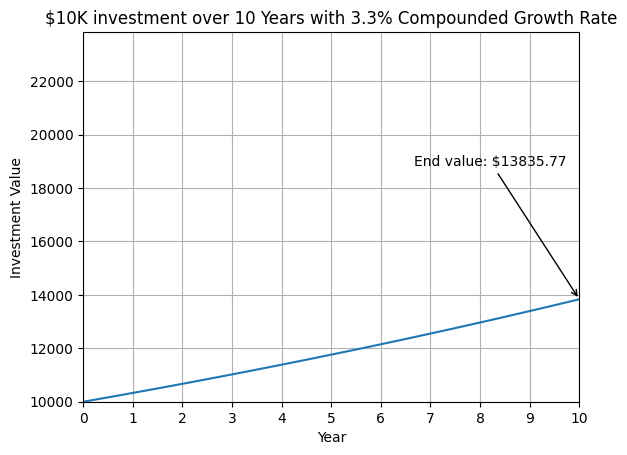

Disclaimer: The information provided in this program is for general guidance and educational purposes only. It does not constitute professional financial or investment advice. We do not guarantee any results and we are not liable for any losses or damages arising from using this information. Always do your own research and seek professional advice before making any financial decisions. Investing involves risks and you may lose money.


In [ ]:
scenario_4()

# References

BlackRock. (n.d.). iShares Canadian Universe Bond Index ETF. Retrieved August 12, 2023, from https://www.blackrock.com/ca/investors/en/products/239493/ishares-canadian-universe-bond-index-etf


BlackRock. (n.d.). iShares S&P/TSX 60 Index ETF. Retrieved August 12, 2023, from https://www.blackrock.com/ca/investors/en/products/239832/ishares-sptsx-60-index-etf

BlackRock. (n.d.). iShares Canadian Financial Monthly Income ETF. Retrieved August 12, 2023, from https://www.blackrock.com/ca/investors/en/products/239476/ishares-canadian-financial-monthly-income-etf

Fortune. (2021, October 28). What is time horizon? Fortune. https://fortune.com/recommends/investing/what-is-time-horizon/

Grable, J. E., & Lytton, R. H. (1999). Financial risk tolerance revisited: The development of a risk assessment instrument. Financial Services Review, 8, 163 – 181.